# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**2207ACDS_teammh3**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.



### TREXTO INC.

- We are an International software/data analytics consultancy firm with Head Office in South Africa, branches in Nigeria and  Kenya.

**Our Members**
- **Tebogo Mngoma**
- **Idongesit Bokeime**
- **Aloysius Sathekge**
- **Emmanuel Momoh**
- **Maryam Ojulari**

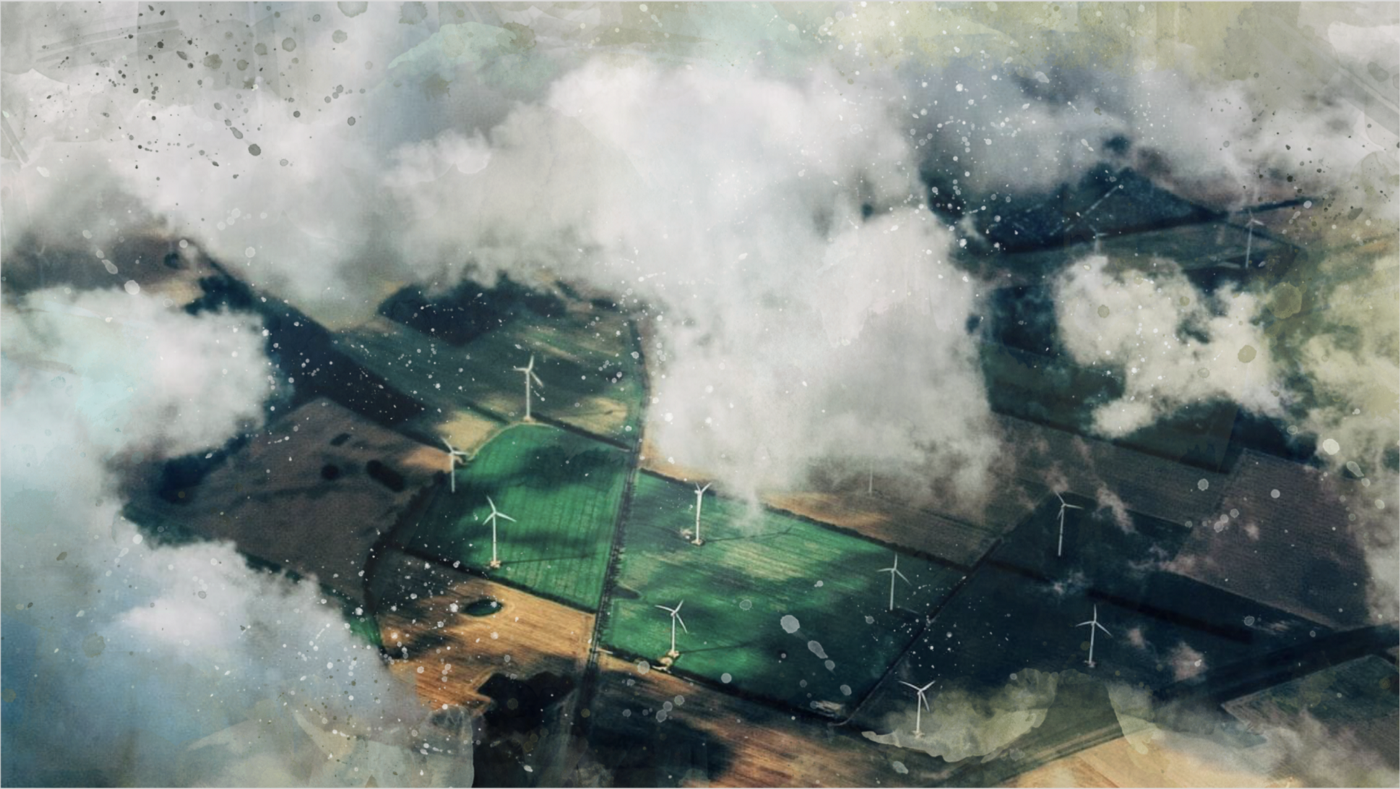

### Predict Overview: Twitter Sentiment Classification

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies
 

## Problem Statement:

- In this project we are tasked to model people's sentiments which shows their believe or lack of believe in climate change. the model will also show people that are not really concerned about climate change**

**Where is this data from?**
- The collection of our given data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, shown below.

- 2 News: the tweet links to factual news about climate change

- 1 Pro: the tweet supports the belief of man-made climate change

- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

- -1 Anti: the tweet does not believe in man-made climate change Variable definitions

**Let's get down to business!**

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#threeone>3.1 Exploratory Data Analysis (Non-graphical)</a>

<a href=#threetwo>3.2 Exploratory Data Analysis (graphical)</a>

<a href=#threethree>3.3 Extracting Top 10 Users for each class of tweet</a>

<a href=#four>4. Data Engineering</a>

<a href=#fourone>4.1 Creating Wordcloud for each class</a>

<a href=#fourtwo>4.2 Creating Wordcloud for Hashtags</a>

<a href=#fourthree>4.3 Data Engineering and Feature Selection</a>

<a href=#five>5. Modeling</a>

<a href=#fiveone>5.1 Building Model Pipeline</a>

<a href=#fivetwo>5.2 Train-Test Split</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Conclusion</a>

<a href=#nine>9. Additional Thoughts</a>

<a href=#ten>9. References</a>

## Installing Comet

Comet ML is an experimentation platform, which permits testing Machine Learning projects, from the beginning up to the final monitoring.It allows data scientists to automatically track their datasets, code changes, experimentation history, and production models creating efficiency, transparency, and reproducibility.

In [46]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="Us6w8Y971trPnUWTc76f7h79R",
    project_name="edsa-twitter-sentiment-classification",
    workspace="nuel000",log_code=True)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/nuel000/edsa-twitter-sentiment-classification/97040eb759cc42c3b90b0a9706d1c802
COMET INFO:   Parameters:
COMET INFO:     C                             : 1
COMET INFO:     algorithm                     : auto
COMET INFO:     alpha                         : 1.0
COMET INFO:     bootstrap                     : True
COMET INFO:     break_ties                    : False
COMET INFO:     cache_size                    : 200
COMET INFO:     ccp_alpha                     : 0.0
COMET INFO:     class_prior                   : 1
COMET INFO:     class_weight                  : 3
COMET INFO:     clf                           : SVC()
COMET INFO:     clf_C                         : 1
COMET INFO:     clf__C                        : 1
COMET INFO:     clf__algorithm 

 <a id="one"></a>
# 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



In [5]:
# downloads
# downloads
#!pip install parfit
#!pip install scikit-plot
#!pip install contractions

# imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.pipeline import Pipeline
import pickle

# feature extractioin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
#import contractions
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# classification models
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tunning methods
#import parfit.parfit as pf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#imports for data visualisation
import seaborn as sns
from PIL import Image
from scipy import stats
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn.metrics import plot_roc_curve
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
# imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.pipeline import Pipeline
import pickle

# feature extractioin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
#import contractions
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# classification models
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tunning methods
#import parfit.parfit as pf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Resampling
from sklearn.utils import resample

# imports for data visualisation
import seaborn as sns
from PIL import Image
from scipy import stats
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn.metrics import plot_roc_curve
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>
# 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



In [6]:
# train data
df = pd.read_csv('https://raw.githubusercontent.com/TebogoMngoma/Twitter_AI_classification/main/train.csv')
#test data
df_test = pd.read_csv('https://raw.githubusercontent.com/TebogoMngoma/Twitter_AI_classification/main/test_with_no_labels.csv')

<a id="three"></a>
# 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



Exploratory Data Analysis (EDA) helps us to understand our data without making any assumptions. It provides context and guidance on the course of action to take when developing the appropriate model. It will also assist in interpreting the results correctly. Without doing EDA it is difficult to understand the data fully.

   <a id="threeone"></a>
   ## 3.1 Exploratory Data Analysis (Non-graphical)
   <a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [7]:
#checking the first 5 rows of the data
df.head(5)

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [8]:
print('The train dataset has {} rows and {} columns.'.format((df.shape[0]),(df.shape[1])))
print('The test dataset has {} rows and {} columns.'.format((df_test.shape[0]),(df_test.shape[1])))

The train dataset has 15819 rows and 3 columns.
The test dataset has 10546 rows and 2 columns.


Using the **shape** command , we can see that our train dataset has 15819 rows and 3 features(columns) and test dataset has 10546 rows and 2 features(columns)

**Class Description**

- 2 News: the tweet links to factual news about climate change

- 1 Pro: the tweet supports the belief of man-made climate change

- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

- -1 Anti: the tweet does not believe in man-made climate change Variable definitions

**Features**
- Tweets/messsages

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


**info** command confirms that our dataset has numerical and catagorical. we have two types of data types which are **int64** and **object** as seen above.If a features has numerical values ,it will have an **int64** Dtype which in our dataset are **sentiment** and **tweetid** and a catagorical features have an **object** Dtype which is the message feature.

In [10]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

the **isnull** command provides the number of null values in our train dataset. To our luck, we seem to not have any null/missing values as that will negative impact when we try build our model later on. 

In [11]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

the **isnull** command provides the number of null values in our test data. To our luck, we seem to not have any null/missing values as that will negative impact when we try build our model later on. 

In [12]:
df.describe()

sentiment        tweetid
count  15819.000000   15819.000000
mean       0.917504  501719.433656
std        0.836537  289045.983132
min       -1.000000       6.000000
25%        1.000000  253207.500000
50%        1.000000  502291.000000
75%        1.000000  753769.000000
max        2.000000  999888.000000

This is where we will be looking at the descriptive statistics of the sentiment feature. We can get the descriptive statistics of the numerical feature by using the describe command. This **describe** command will provide the mean, standard deviation and a five number summary of each numerical feature. The five number summary (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum) is also used for creating the box plot.

In [13]:
df['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

the **unique** command  will check all possible classes in the target variable of our dataset. from our oobservaton we can see we have 4 different unique values in our target variable.

<a id="threetwo"></a>
## 3.2 Exploratory Data Analysis (Graphical)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [14]:
df_2 = df.copy()

before we start working on our dataset it's important to make a copy just incase we make an error


In [15]:
df_2 =df.replace({'sentiment' : { -1: 'Anti', 0 : 'Neutral', 1 : 'Pro',2: 'News'}})

we have to create a dataframe to visualize the distribution of sentiments


In [16]:
df_2['sentiment'].value_counts()

Pro        8530
News       3640
Neutral    2353
Anti       1296
Name: sentiment, dtype: int64

- Pro class has 8530 values representing 53% of the users believe in climate change
- News class has 3640 values representing 23% of tweets of factual news about cllimate change
- Anti class has 1296 values representing 8% of users that do not believe in climate change
- Neutral class has 2353 values representiing 14% of users that neither believes or deny climate change

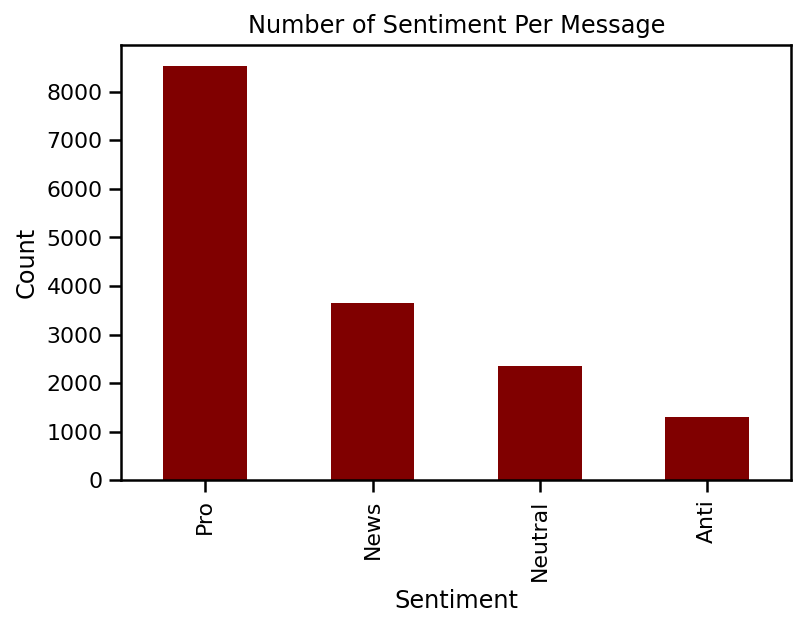

In [144]:
#visualizing the distribution of sentiments

df_2['sentiment'].value_counts().plot(kind = 'bar',color = 'maroon')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Sentiment Per Message')
plt.show()

**Observation(s)**: Seems we have a large proportion of people who believe climate change is caused by man-kind

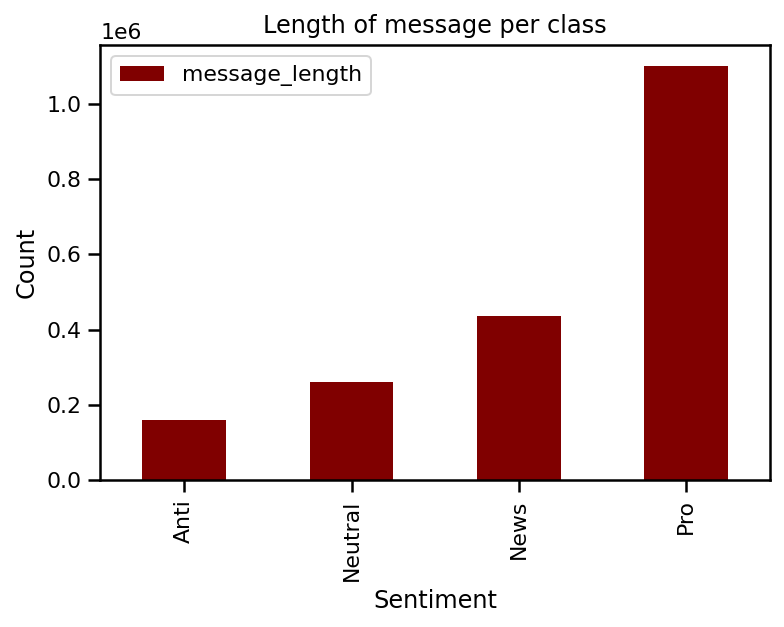

In [145]:
#lets also look the length of tweet for all classes
df_2['message_length'] = df_2["message"].str.len()

df_2[['message_length','sentiment']].groupby(['sentiment']).sum().plot(kind = 'bar',color = 'maroon')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Length of message per class')

plt.show()
# change Y axis scale later

**Observation(s)**: Tweets with the Highest number of characters/words per tweets are Pro tweets i.e People who are of the opinion that climate change is caused by man kind.

<a id="threethree" id="1.1"></a>
## 3.3 Extracting Top 10 Users for each class of tweet
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [146]:
import re 
df_2['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in df_2.message]

Code above allows us to extract usernames from message feature

In [147]:
df_2.head()

sentiment                                            message  tweetid  \
0       Pro  PolySciMajor EPA chief doesn't think carbon di...   625221   
1       Pro  It's not like we lack evidence of anthropogeni...   126103   
2      News  RT @RawStory: Researchers say we have three ye...   698562   
3       Pro  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4       Pro  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

   message_length             users  
0             140         @mashable  
1              62               NaN  
2             140         @RawStory  
3              99               NaN  
4             122  @SoyNovioDeTodas

In [148]:
counts = df_2[['message', 'users']].groupby('users', as_index=False).count().sort_values(by='message', ascending=False)
counts.head()

users  message
3410  @StephenSchlegel      307
3270       @SenSanders      243
6182  @realDonaldTrump      143
448     @BernieSanders      121
612               @CNN      106

A counts of users was generated 


#### Display our data using seaborn

we will use a python library seaborn that uses Matplotlib  to display our extracted data graphically.  It provides a high-level interface for drawing attractive and informative statistical graphics.

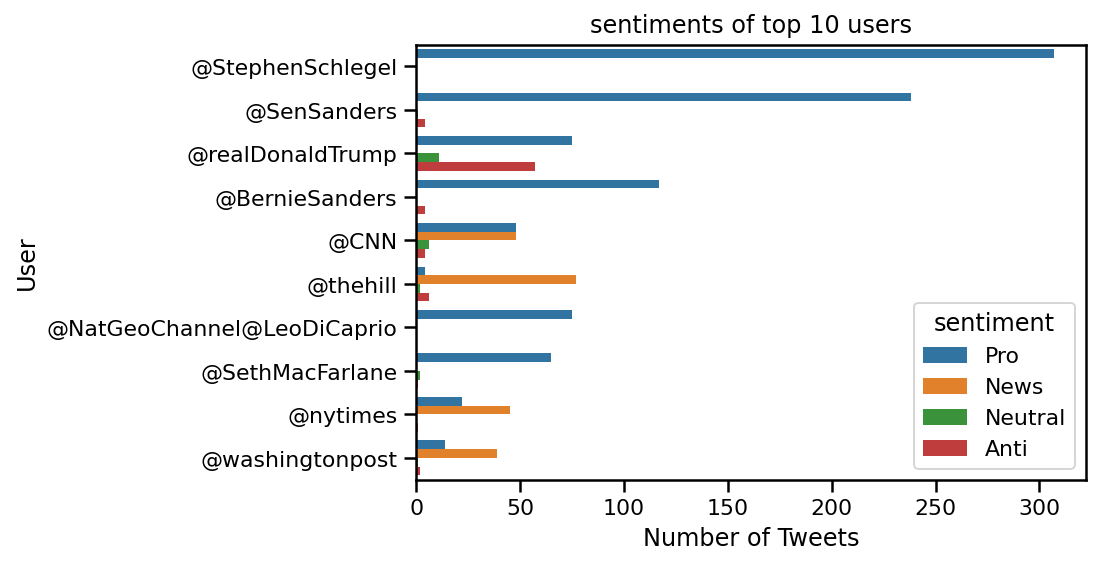

In [149]:
sns.countplot(y="users", hue="sentiment", data=df_2,
              order=df_2.users.value_counts().iloc[:10].index)
plt.ylabel('User')
plt.xlabel('Number of Tweets')
plt.title('sentiments of top 10 users')
plt.show()

 The graph above shows the sentiments of top the 10 mentioned users in our dataset


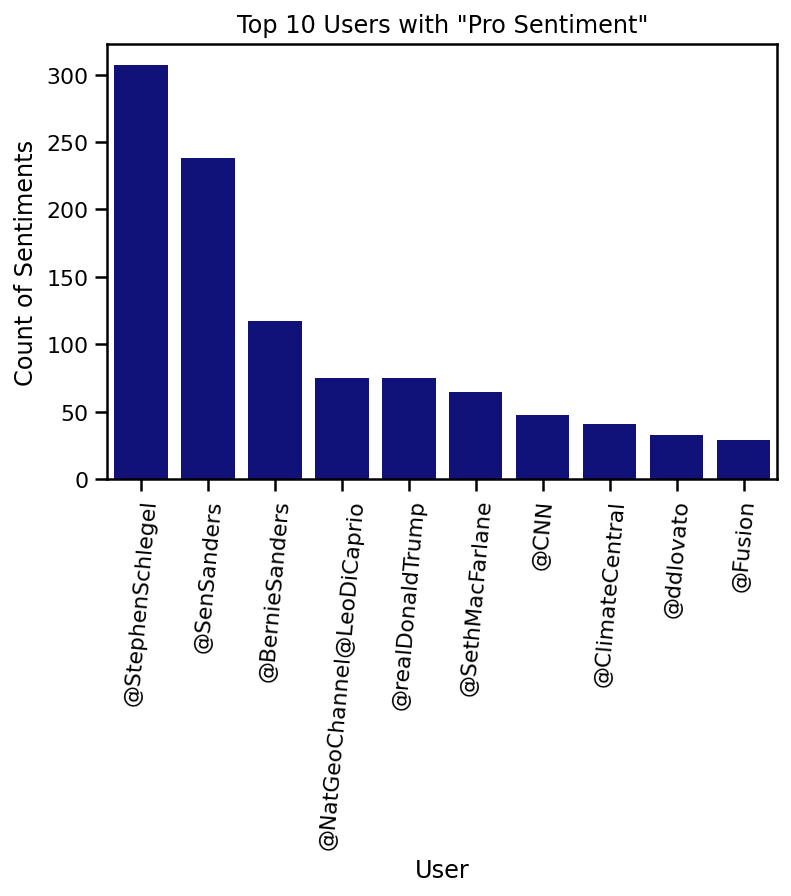

In [150]:
sns.countplot(x="users",color = 'darkblue',data=df_2[df_2['sentiment'] == 'Pro'],
              order=df_2[df_2['sentiment'] == 'Pro'].users.value_counts().iloc[:10].index) 

plt.xlabel('User')
plt.ylabel('Count of Sentiments')
plt.title('Top 10 Users with "Pro Sentiment"')
plt.xticks(rotation=85)
plt.show()

**Our top 10 users with pro sentiments**:

* @StephenSchlegel

* @SenSanders

* @BernieSanders

* @NatGeoChannel

* @realDonaldTrump

* @SethMacFarlane

* @CNN

* @ClimateCentral

* @ddlovato

* @Fusion

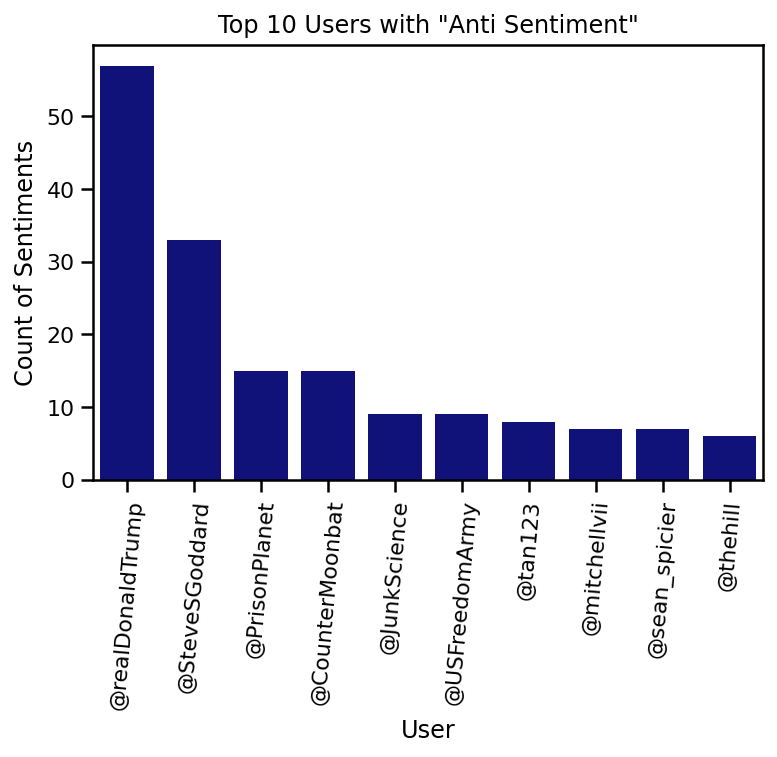

In [151]:
sns.countplot(x="users",color = 'darkblue',data=df_2[df_2['sentiment'] == 'Anti'],
              order=df_2[df_2['sentiment'] == 'Anti'].users.value_counts().iloc[:10].index) 

plt.xlabel('User')
plt.ylabel('Count of Sentiments')
plt.title('Top 10 Users with "Anti Sentiment"')
plt.xticks(rotation=85)
plt.show()

**Our Top 10 Users with Anti Sentiments**

* @realDonaldTrump

* @SteveSGoddard

* @PrisonPlanet

* @CounterMoonbat

* @JunkScience

* @USFreedomArmy

* @tan123

* @mitchellvii

* @sean_spicier

* @thehill

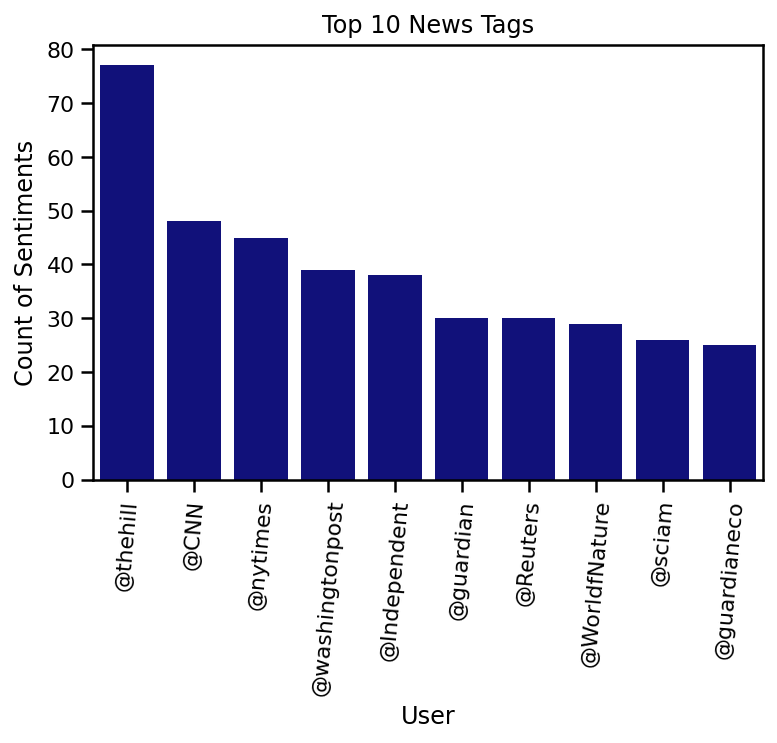

In [152]:
sns.countplot(x="users",color = 'darkblue',data=df_2[df_2['sentiment'] == 'News'],
              order=df_2[df_2['sentiment'] == 'News'].users.value_counts().iloc[:10].index) 

plt.xlabel('User')
plt.ylabel('Count of Sentiments')
plt.title('Top 10 News Tags')
plt.xticks(rotation=85)
plt.show()

**Top 10 users Tagged as News relating to Cliamte Change**

* @thehill

* @CNN

* @nytimes

* @washingtonpost

* @Independent

* @guardian

* @Reuters

* @WorldfNature

* @sciam

* @guardianeco

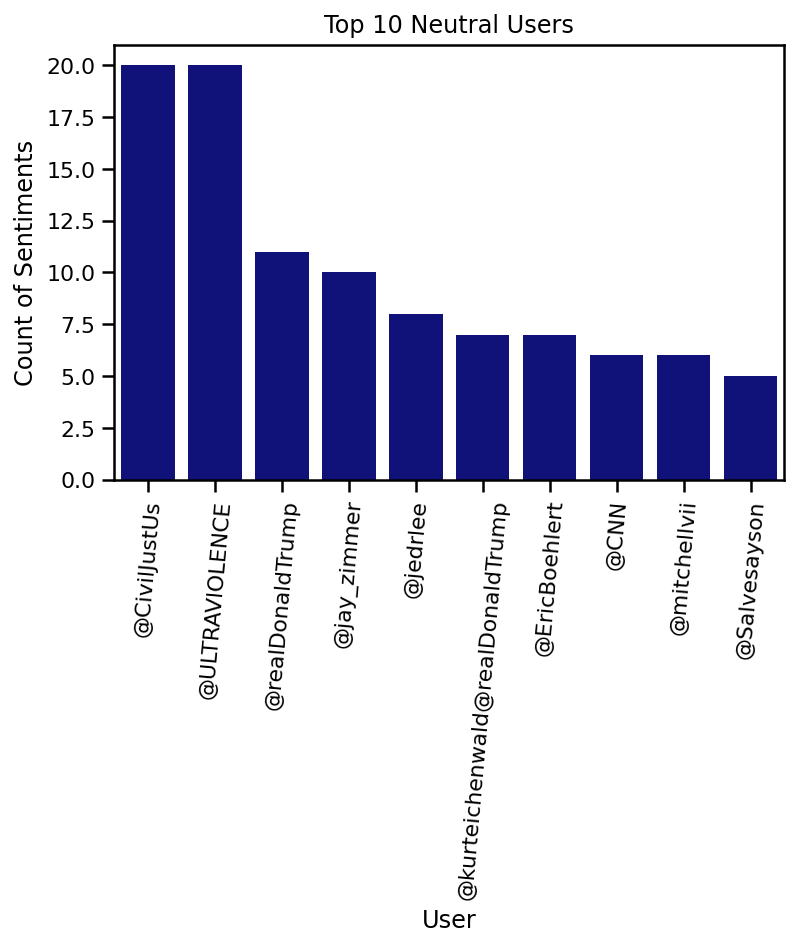

In [153]:
sns.countplot(x="users",color = 'darkblue',data=df_2[df_2['sentiment'] == 'Neutral'],
              order=df_2[df_2['sentiment'] == 'Neutral'].users.value_counts().iloc[:10].index) 

plt.xlabel('User')
plt.ylabel('Count of Sentiments')
plt.title('Top 10 Neutral Users')
plt.xticks(rotation=85)
plt.show()

**Top 10 users Tagged as Neutral**

* @CivilJustUs

* @ULTRAVlOLENCE

* @realDonaldTrump

* @jay_zimmer

* @jedrlee

* @kurteichenwald

* @realDonaldTrump

* @EricBoehlert

* @CNN'

* @mitchellvii

* @Salvesayson

From our observation of the different graphs related to their respectable class, we can identity that the user @realDonaldTrump is mentioned in 75% of the 4 different classes suggesting that he's an active participant of the Climate change tweets and @CNN is mentioned in 50% of the different classes which also suggest it's the most active news station which tweets about climate change more frequently than most of the other news stations

<a id="four"></a>
# 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- In the above-given problem statement before training the model, we have performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing emojis. The text document is then converted into the lowercase for better generalization.

- The punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we have also removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.

- Lastly, we performed Lemmatization(reducing the derived words to their root form known as lemma) for better results.

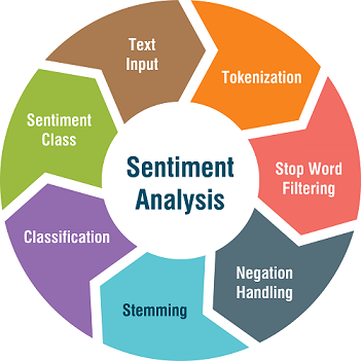

In [17]:
train = df.copy()
import re

using **copy** command, we can make a copy of the dataframe and **import re** imports RegeX for Feature extraction

In [18]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+' ## Remove urls 
subs_url = r''
train['message_clean'] = train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True) ## replace all urls with clean space

# Make lower case
train['message_clean'] = train['message_clean'].str.lower()

# remove twitter handles (@user)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

train['message_clean'] = np.vectorize(remove_pattern)(train['message_clean'], "@[\w]*")

# removing punctuations
import string
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])
train['message_clean'] = train['message_clean'].apply(remove_punctuation)

train['message_clean'] = train['message_clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format.

we will use RegEx or Regular Expressions to extract usefull information and remove all uneccessary text to make it more readable and useable when we want to build our model

In [19]:
def decontracted(phrase):
    phrase = phrase.rstrip() #returns a copy of the string in which all characters have been stripped from the end of the string
    phrase = ' '.join(phrase.split()) #Join all items in a tuple into a string
    phrase = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', phrase) #remove special cases
    phrase = re.sub('@[\w]+','',phrase) # remove @ mentioned users
    phrase = re.sub(r'[^\x00-\x7f]',r'', phrase) #remove all non-ASCII characters
    return phrase

train['message_clean'] = train['message_clean'].apply(decontracted)

the **decontracted** fuction removing emojis and all special characters from tweets

we applied the fuction to message column to clean the tweets text noise  


In [21]:
train.head(5)

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       message_clean  
0  polyscimajor chief doesnt think carbon dioxide...  
1    like lack evidence anthropogenic global warming  
2  researchers have three years climate change be...  
3  todayinmaker wired 2016 pivotal year climate c...  
4  2016 racist sexist climate change denying bigo...

the above table shows our new feature with clean text and comparing the **message** feature with **message_clean** , we can observe that we no longer have special characters, punctuations and the text was also lowered to remove capitalisation noise 

In [22]:
# Combining all the messages
message_before_cleaning = " ".join(tweet for tweet in train['message'])
message_after_cleaning = " ".join(tweet for tweet in train['message_clean'])

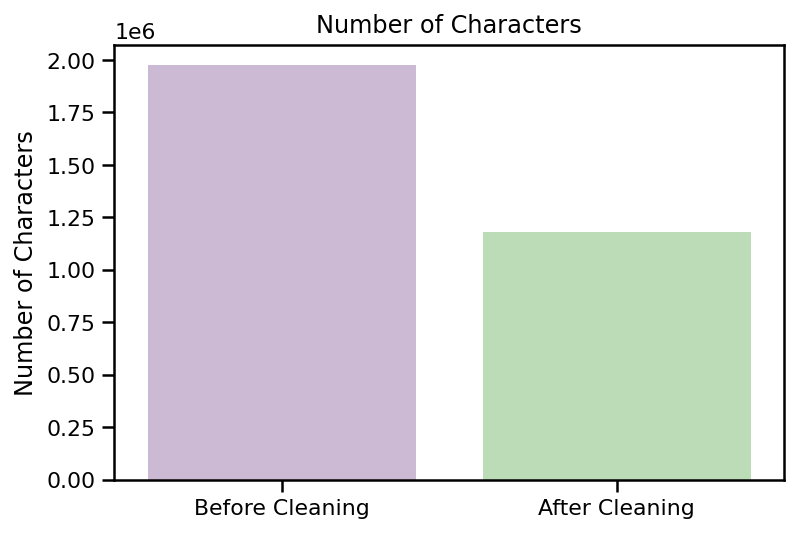

In [160]:
# Numbers of characters
sns.barplot(x=['Before Cleaning', 'After Cleaning'], y=[len(message_before_cleaning), len(message_after_cleaning)], palette='PRGn')
# sns.countplot(x=[] ,data = working_df, palette='PRGn')
plt.ylabel('Number of Characters')
# plt.xlabel('Sentiment')
plt.title('Number of Characters')
plt.show()

The bar plot above shows the number of characters before and after cleaning.Special characters in the text dataset add no value to text-understanding and induce noise into algorithms and by removing them, this will reduce redundancy and improve model prediction accuracy and performance processing by nearly 50%  and since we are dealing with text,numbers also might not add much information to text dataset and also have to removed

<a id="fourone" id="1.1"></a>
## 4.1 Creating wordcloud for each Class
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is. this is an ideal way to pull out the most pertinent parts of textual data our databaset.Word cloud can also helps compare and contrast two different pieces of text to find the wording similarities between the two.

| ⚡ <font size="4">Word cloud for all words in our Message_clean feature</font> ⚡ |
| :--------------------------- |
| <font size="3">Word Cloud below shows us the most frequent words appearing in our **Message_clean** feature</font> |

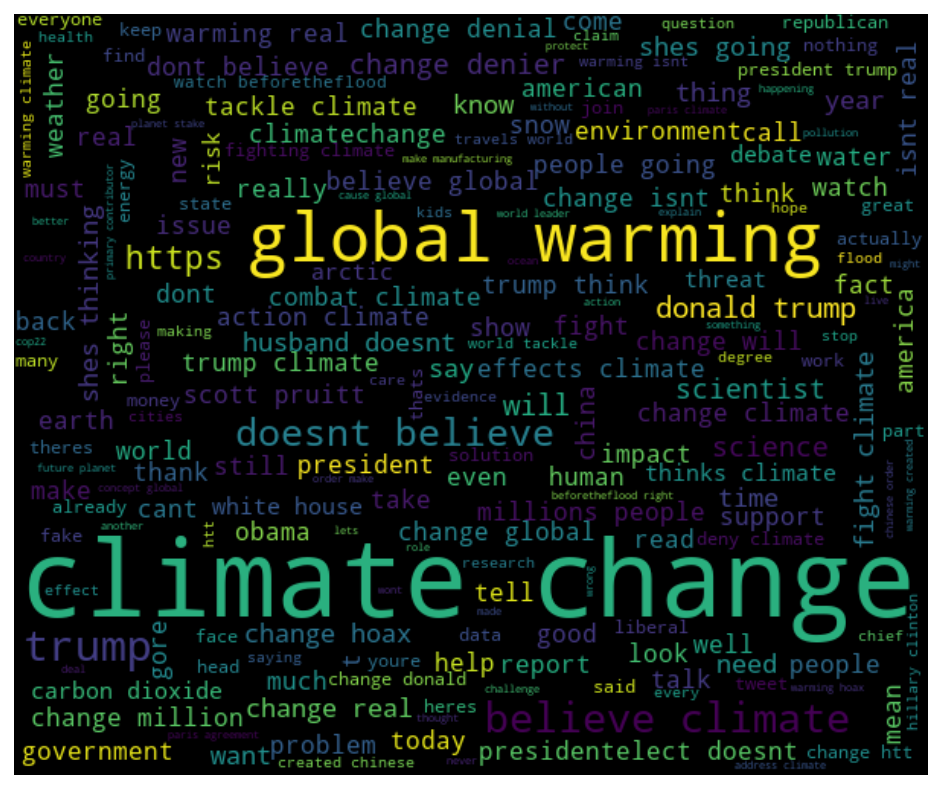

In [161]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=500,random_state=21, max_font_size=110).generate(message_after_cleaning)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

| ⚡ <font size="4">Anti-class sentiment word cloud</font> ⚡ |
| :--------------------------- |
| <font size="3">Word Cloud below shows us the most frequent words appearing in the Anti-class sentiment </font> |

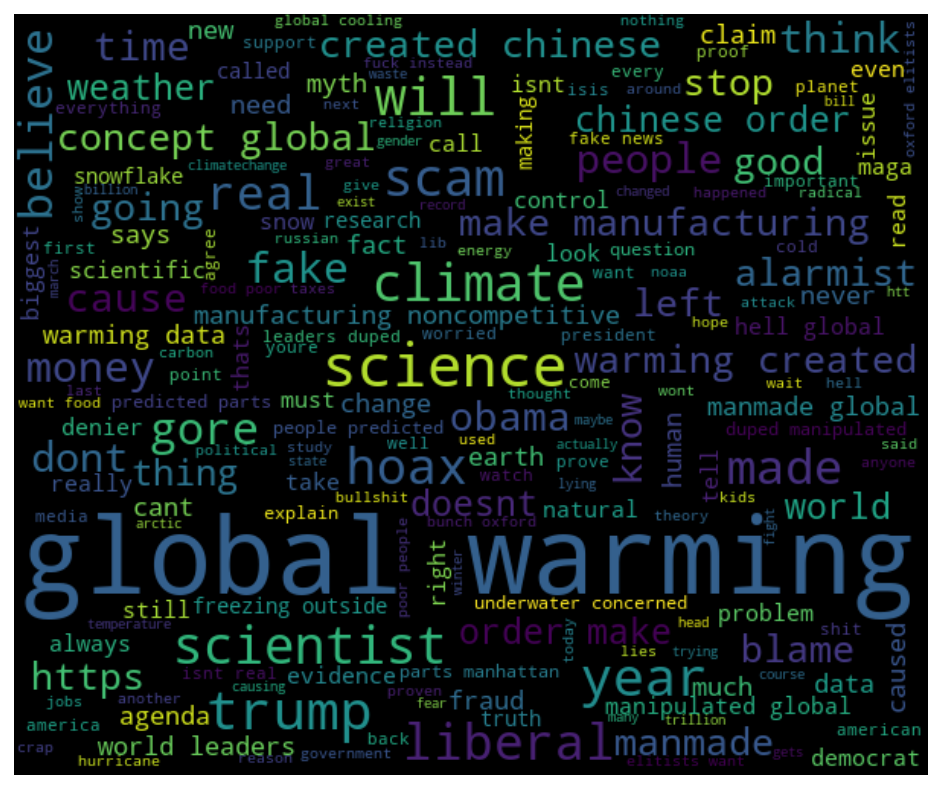

In [162]:
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in train['message_clean'][train['sentiment'] == -1]))
wordcloud = wordcloud = WordCloud(width=600, height=500,random_state=21, max_font_size=110).generate(message_after_cleaning).generate(corpus)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

| ⚡ <font size="4">Pro-class Word cloud</font> ⚡ |
| :--------------------------- |
| <font size="3">Word Cloud below shows us the most frequent words appearing in the pro-class sentiment</font> |

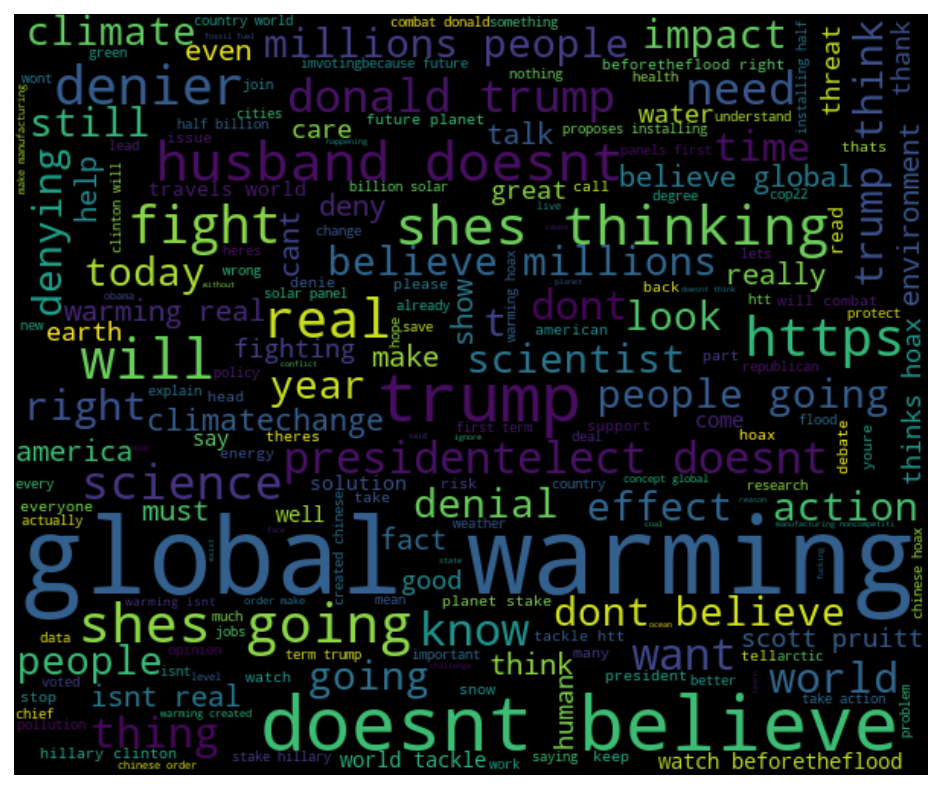

In [163]:
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in train['message_clean'][train['sentiment'] == 1]))
wordcloud = wordcloud = WordCloud(width=600, height=500,random_state=21, max_font_size=110).generate(message_after_cleaning).generate(corpus)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

| ⚡ <font size="4">News class Word cloud </font> ⚡ |
| :--------------------------- |
| <font size="3">Word Cloud below shows us the most frequent words appearing in the New class sentiment</font> |

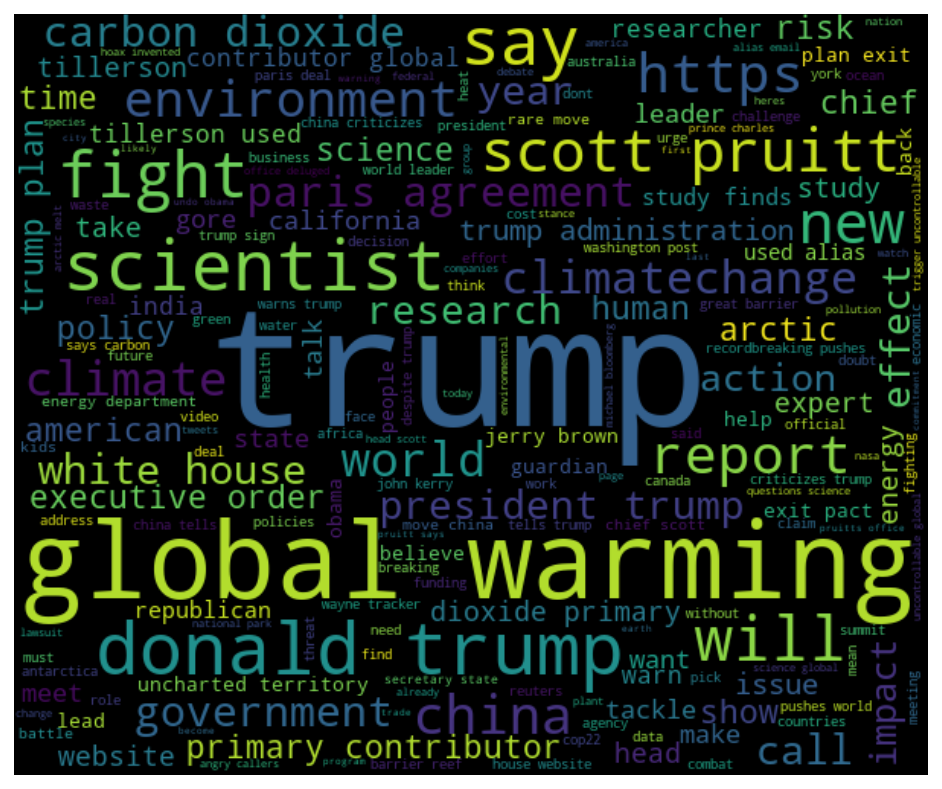

In [164]:
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in train['message_clean'][train['sentiment'] == 2]))
wordcloud = wordcloud = WordCloud(width=600, height=500,random_state=21, max_font_size=110).generate(message_after_cleaning).generate(corpus)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

the 4 Word clouds above show the most frequent word on each respective class. from our observation we can see some words that appear more frequently are much bigger in font size, words like "Global Warming" "Climate change" "Donald Trump" "Paris agreement" e.t.c

<a id="fourtwo" id="1.1"></a>
## 4.2 Creating wordcloud for Hashtags
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [54]:
train['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in train.message]

The code above allows us to extract hashtags as they give Tweets context and allows people to easily follow topics that they're interested in and we also create a new feature **hashtags** to store our hashtag variables separately.

In [166]:
train.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       message_clean         hashtags  
0  polyscimajor chief doesnt think carbon dioxide...              NaN  
1    like lack evidence anthropogenic global warming              NaN  
2  researchers have three years climate change be...              NaN  
3  todayinmaker wired 2016 pivotal year climate c...  #TodayinMaker #  
4  2016 racist sexist climate change denying bigo...   #ElectionNight

| ⚡ <font size="4">Pro sentiment Word cloud hashtags</font> ⚡ |
| :--------------------------- |
| <font size="3">Word Cloud below shows us the most frequent hashtags appearing our **Pro** class sentiment</font> |

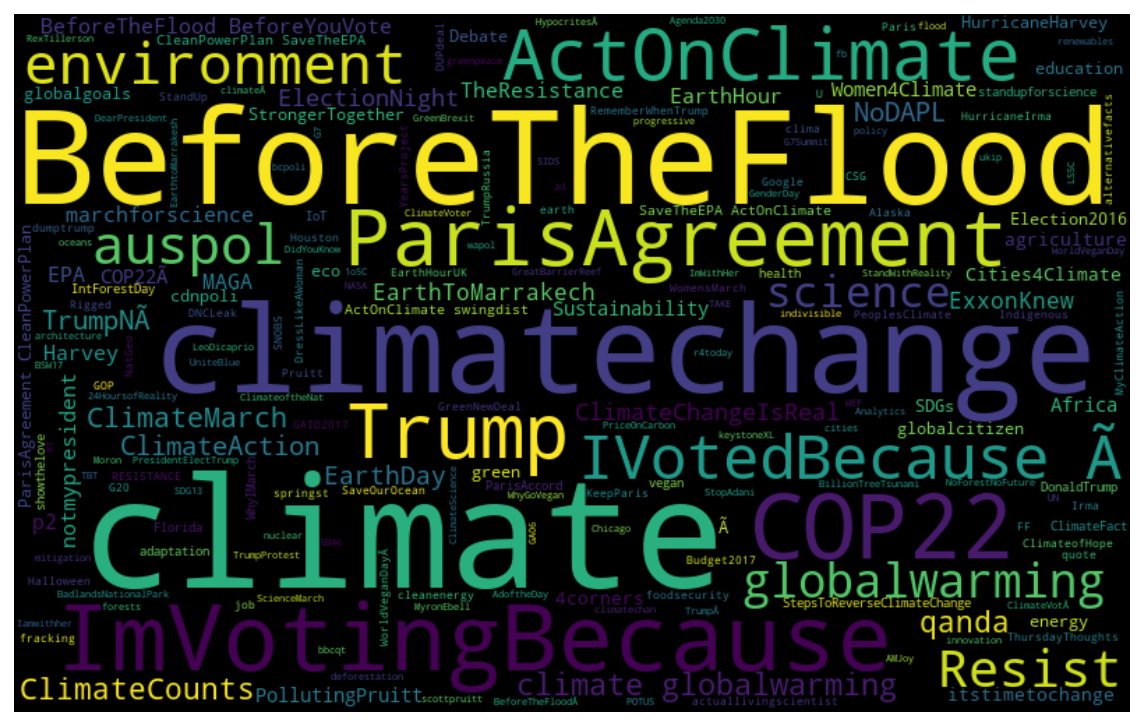

In [167]:
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in train['hashtags'][train['sentiment'] == 1] if type(tweet) == str))
wordcloud = wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(corpus)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

| ⚡ <font size="4">Anti sentiment Word cloud hashtags</font> ⚡ |
| :--------------------------- |
| <font size="3">Word Cloud below shows us the most frequent hashtags appearing our **Anti** class sentiment</font> |

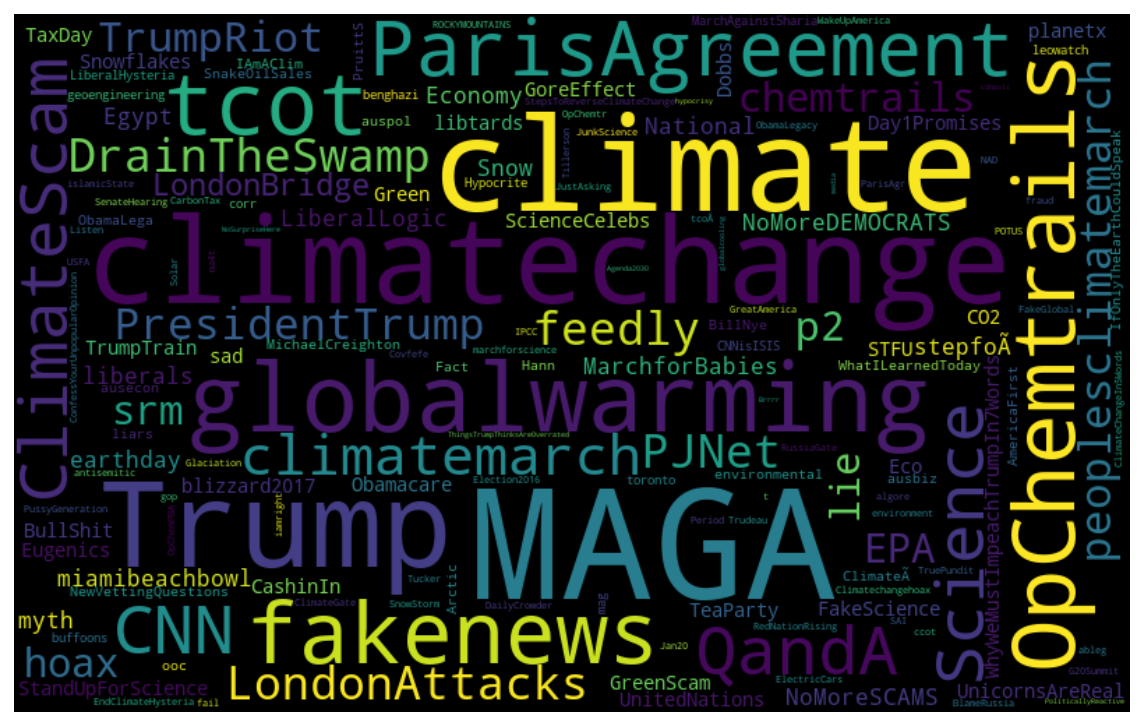

In [168]:
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in train['hashtags'][train['sentiment'] == -1] if type(tweet) == str))
wordcloud = wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(corpus)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

| ⚡ <font size="4">News sentiment Word cloud hashtags</font> ⚡ |
| :--------------------------- |
| <font size="3">Word Cloud below shows us the most frequent hashtags appearing our **News** class sentiment</font> |

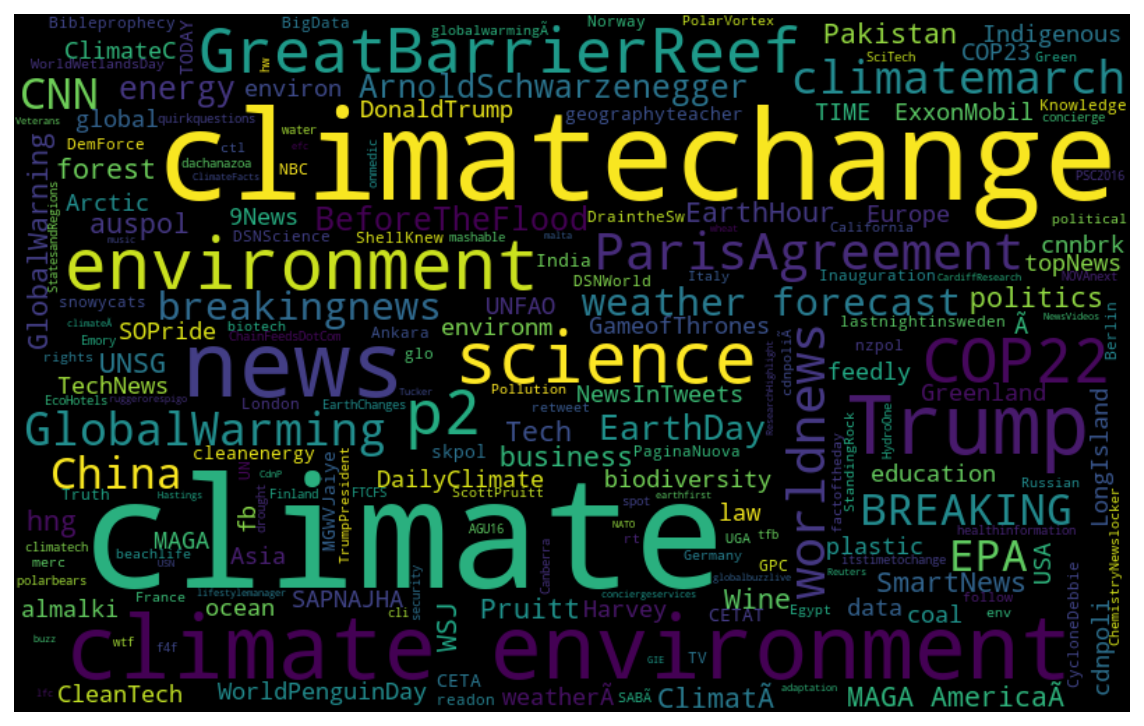

In [169]:
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in train['hashtags'][train['sentiment'] == 2] if type(tweet) == str))
wordcloud = wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(corpus)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

| ⚡ <font size="4">Neutral sentiment Word cloud hashtags</font> ⚡ |
| :--------------------------- |
| <font size="3">Word Cloud below shows us the most frequent hashtags appearing our **Neutral** class sentiment</font> |

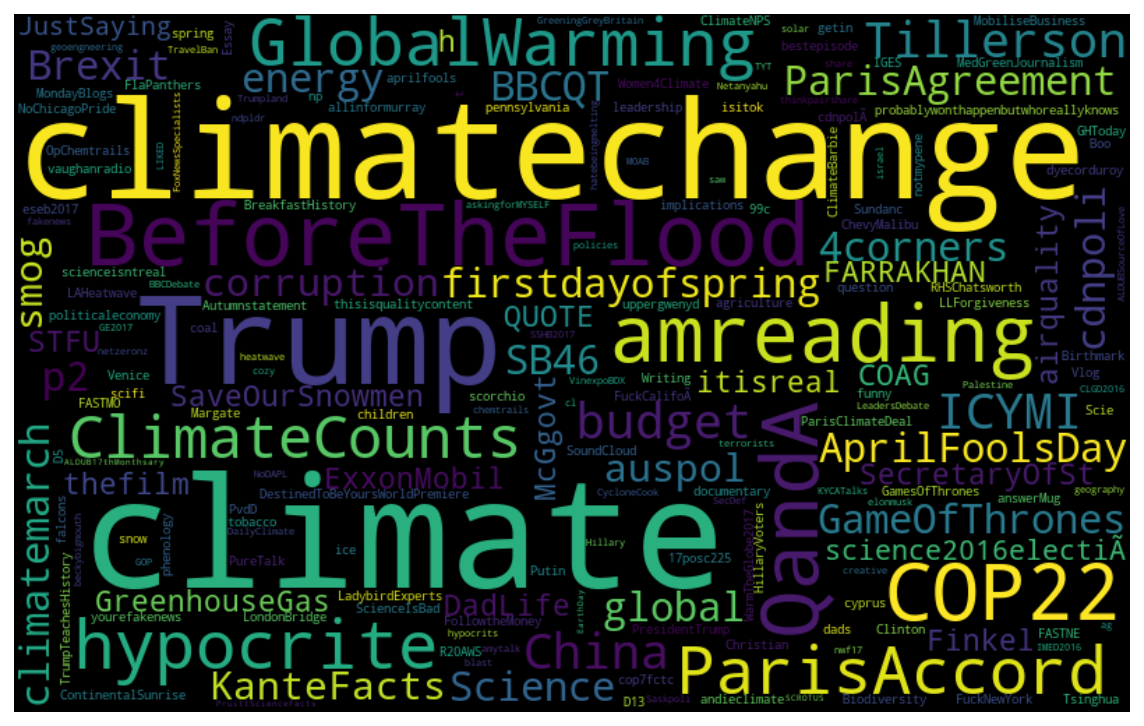

In [170]:
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in train['hashtags'][train['sentiment'] == 0] if type(tweet) == str))
wordcloud = wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(corpus)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

the 4 Word clouds above show the most frequent hashtags on each respective class. from our observation we can see some words that appear more frequently are much bigger in font size, words like "COP22" "Climate change" "Enviroment" "Paris agreement" "Global warming" e.t.c

<a id="fourthree" id="1.1"></a>
## 4.3 Data Engineering and Feature Selection
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Data engineering is the process of designing and building models, collect and analyze raw data which contain multiple variables.This process helps to find practical applications of the data and once our data set has been fully cleaned and formatted through data engineering, it’s easier and faster to read and understand.Feature selection is a method of filtering out the important features as all the features present in the dataset are not equally important and removes unimportant data reduces redundancy.

### Balancing Target Variable Distribution

From our exploratory data analysis, we recall that the target variable is imbalance in terms of distribution and this can cause bais in our model performance.

In [23]:
data = train.copy()

In [24]:
# creating a resampling variables

class_size = int(len(data[data['sentiment']==1]))

seperate the four classes to make it easier to resample our data


In [25]:
class_1 = data[data['sentiment']==-1]
class_2 = data[data['sentiment']==0]
class_3 = data[data['sentiment']==1]
class_4 = data[data['sentiment']==2]

In [26]:
# upsampling classes 1, 2, and 4 & downsampling class 3
class_1_up = resample(class_1,replace=True,n_samples=class_size, random_state=27)
class_2_up = resample(class_2,replace=True,n_samples=class_size, random_state=27)
class_4_up = resample(class_4,replace=True,n_samples=class_size, random_state=27)
class_3_down = resample(class_3,replace=False,n_samples=class_size, random_state=27)

we need to create a new DataFrame out of the balanced bata


In [27]:
res_df = pd.concat([class_1_up, class_2_up, class_4_up,class_3_down])

The countplot below will confirm graphically if the data has been well-balanced

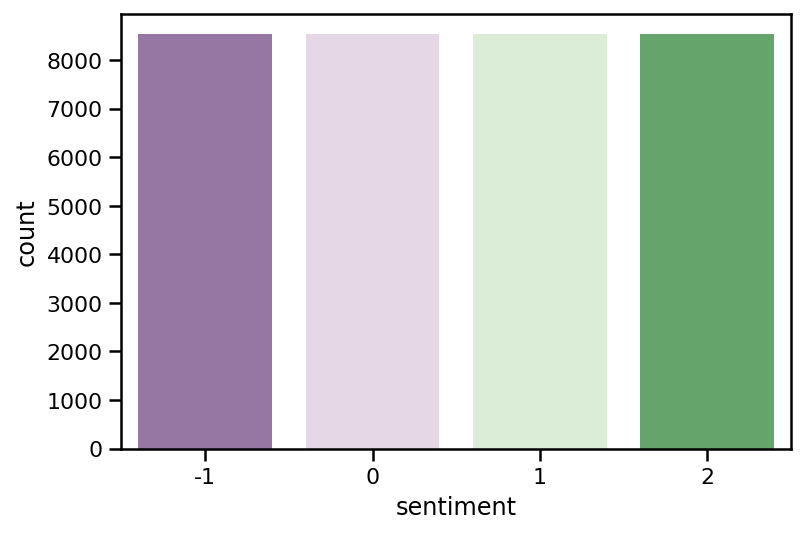

In [176]:
sns.countplot(x = res_df['sentiment'], data = data, palette='PRGn')
plt.show()

Our sentiment feature was previously imbalanced and tended to more skwed towards our **Pro** class sentiment and that would have negative implications to our model prediction accuracy as it was going to prodce results which are more favoured toward our **pro** class. we balanced our sentiment feature using **resample** module and this will result in an increased model prediction accuracy with low bias prediction

<a id="six"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- Now, that we have cleaned our data and gained a brief view through the WordClouds, we will prepare the data for modelling. Preparation of text data involves converting into some numeric format which the machine learning models can understand. The computers only understand numerical data and therefore this is necessary.

- Generally, there are various ways to convert text data into numeric form like CountVectorizer, TfIdf, etc. Count Vectorizer is based on the bag of words model. It works by counting the words’ frequencies in each document (each tweet in this case).

- With TfIdf( Term Frequency–Inverse Document Frequency), the numeric values increase with the increase in the count of the words but are offset by the occurrence of the same word in the different corpus. For example, if there is a word ‘apple’ with many occurrences in a document with its presence in about 80% of the tweets, count vectorizer will give a high value for apple but TfIdf will have a negligible value because it is a common word occurring in many documents and therefore isn’t a useful word to classify the documents(or tweets here).

- In this case, we will use TfIdf.

In this project, we are going to make use of the follow models:

* Random forest

* Linear SVC

* Naive Bayes

* K Nearest Neighbours

* Logistic regression

<a id="fiveone" id="1.1"></a>
## 5.1 Building The Model Pipeline
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [29]:

# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [51]:
# Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

# Linear Logistic regression
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', SVC())])

# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

# K-NN Classifier
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])

# Logistic Regression
lr = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1, 
                                         class_weight='balanced', 
                                         max_iter=1000))])

<a id="fivetwo" id="1.1"></a>
###  5.2  Train-Test Split
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- We will now use train_test_split to create new training and test set to get the best model. We can then use the best model on our original test set to get the F1 score.

In [52]:
X = res_df['message_clean']

y = res_df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [53]:
#Training the models using Pipeline created

# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Niave bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Linear regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Linear SVC
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_test)

COMET ERROR: Failed to extract parameters from estimator


<a id="seven" id="1.1"></a>
### Model 1 - Random Forest
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


- A meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

- It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

- Reduction in over-fitting and its more accurate than decision trees in most cases.

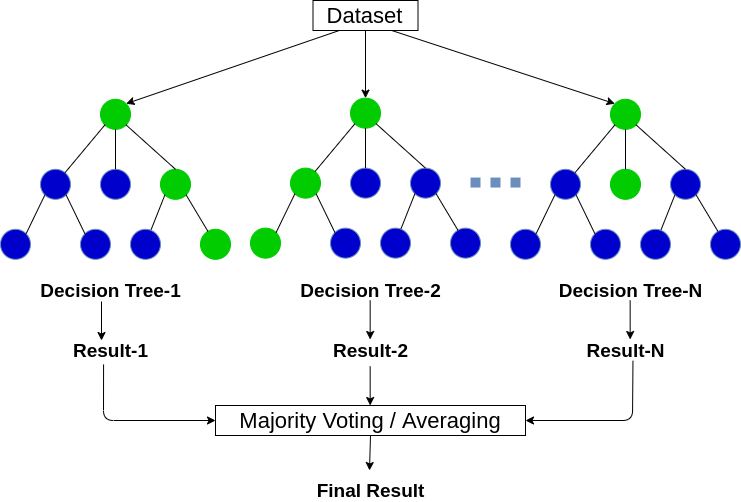

              precision    recall  f1-score   support

          -1       0.69      0.50      0.58      1707
           0       0.58      0.39      0.47      1722
           1       0.57      0.31      0.40      1724
           2       0.42      0.87      0.56      1671

    accuracy                           0.52      6824
   macro avg       0.57      0.52      0.50      6824
weighted avg       0.57      0.52      0.50      6824



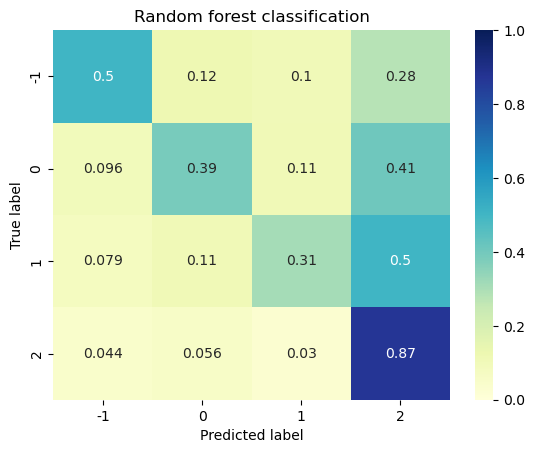

In [33]:
# Generate a classification Report for the random forest model
print(metrics.classification_report(y_test, y_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=rf.classes_, 
            yticklabels=rf.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Random forest classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Model 2 -   Support Vector Machine (SVM)

- Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

- Effective in high dimensional spaces and uses a subset of training points in the decision function so it is also memory efficient.

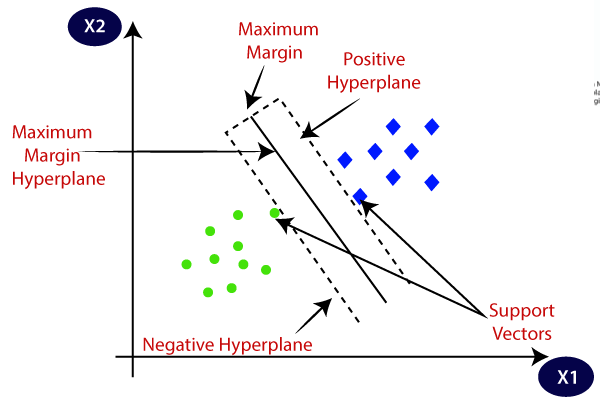

              precision    recall  f1-score   support

          -1       0.98      0.99      0.98      1707
           0       0.94      0.95      0.95      1722
           1       0.92      0.86      0.89      1724
           2       0.92      0.96      0.94      1671

    accuracy                           0.94      6824
   macro avg       0.94      0.94      0.94      6824
weighted avg       0.94      0.94      0.94      6824



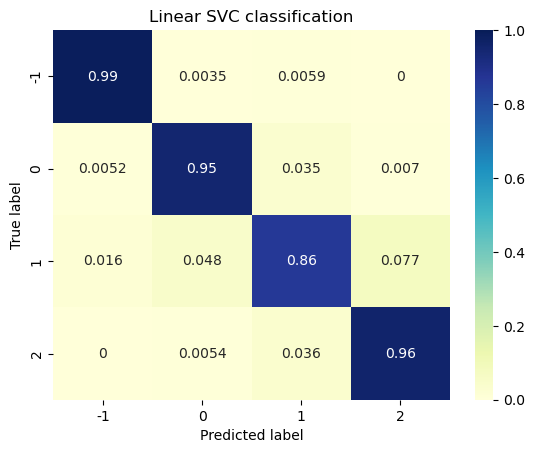

In [34]:
# Generate a classification Report for the linear SVC model
print(metrics.classification_report(y_test, y_pred_lsvc))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_lsvc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lsvc.classes_, 
            yticklabels=lsvc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Linear SVC classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Model 3 - Logistic Regression

Logistic function is a function that resembles an “S” shaped curve when plotted on a graph. It takes values between 0 and 1 and “squishes” them towards the margins at the top and bottom, labeling them as 0 or 1.

- In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

- Designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.

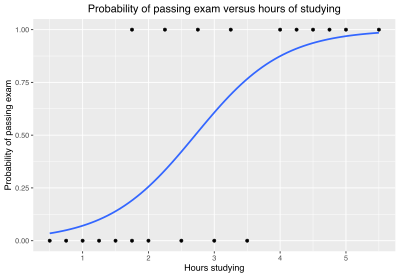

              precision    recall  f1-score   support

          -1       0.88      0.96      0.92      1707
           0       0.85      0.86      0.85      1722
           1       0.85      0.70      0.77      1724
           2       0.85      0.92      0.89      1671

    accuracy                           0.86      6824
   macro avg       0.86      0.86      0.86      6824
weighted avg       0.86      0.86      0.86      6824



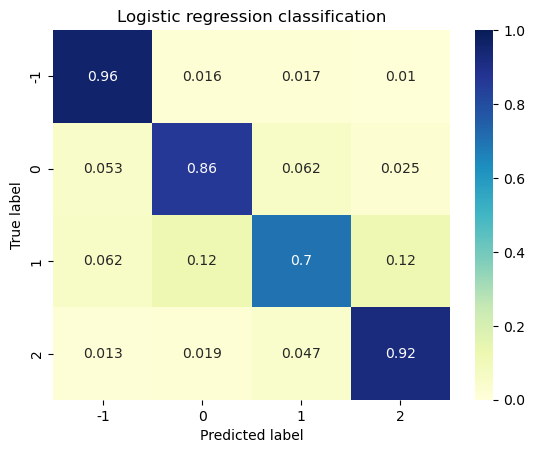

In [35]:
# Generate a classification Report for Logistic Regression
print(metrics.classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lr.classes_, 
            yticklabels=lr.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Logistic regression classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### The K-Nearest Neighbors (KNN)

K-nearest neighbors (KNN) is a type of supervised learning algorithm used for both regression and classification. KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closet to the test data. The KNN algorithm calculates the probability of the test data belonging to the classes of ‘K’ training data and class holds the highest probability will be selected. In the case of regression, the value is the mean of the ‘K’ selected training points.

- The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.
- The "K" in KNN is a parameter that determines the number of nearest neighbors to include in the voting process

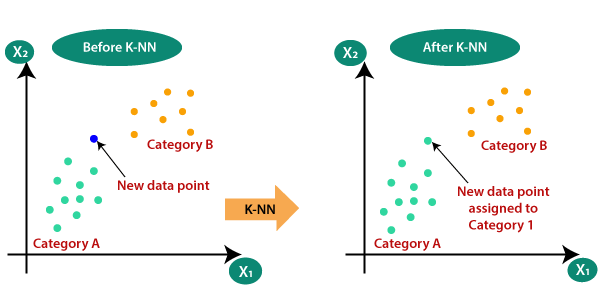

              precision    recall  f1-score   support

          -1       0.81      0.97      0.88      1707
           0       0.72      0.84      0.78      1722
           1       0.79      0.45      0.57      1724
           2       0.80      0.86      0.83      1671

    accuracy                           0.78      6824
   macro avg       0.78      0.78      0.76      6824
weighted avg       0.78      0.78      0.76      6824



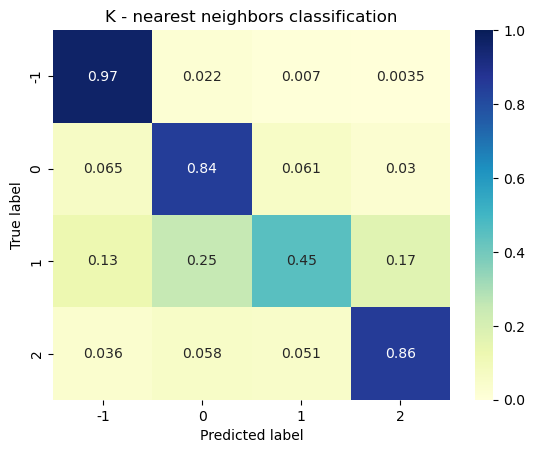

In [36]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_test, y_pred_knn))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('K - nearest neighbors classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Naive Bayes

- Naive bayes uses Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other.
- It performs well in Multi-class predictions as compared to the other Algorithms.
- It is the most popular choice for text classification problems.

- Requires a small amount of training data to estimate the necessary parameters. Naive Bayes classifiers are extremely fast compared to more sophisticated methods.

**Disadvantage**Naive Bayes assumes that all features are independent or unrelated, so it cannot learn the relationship between features.

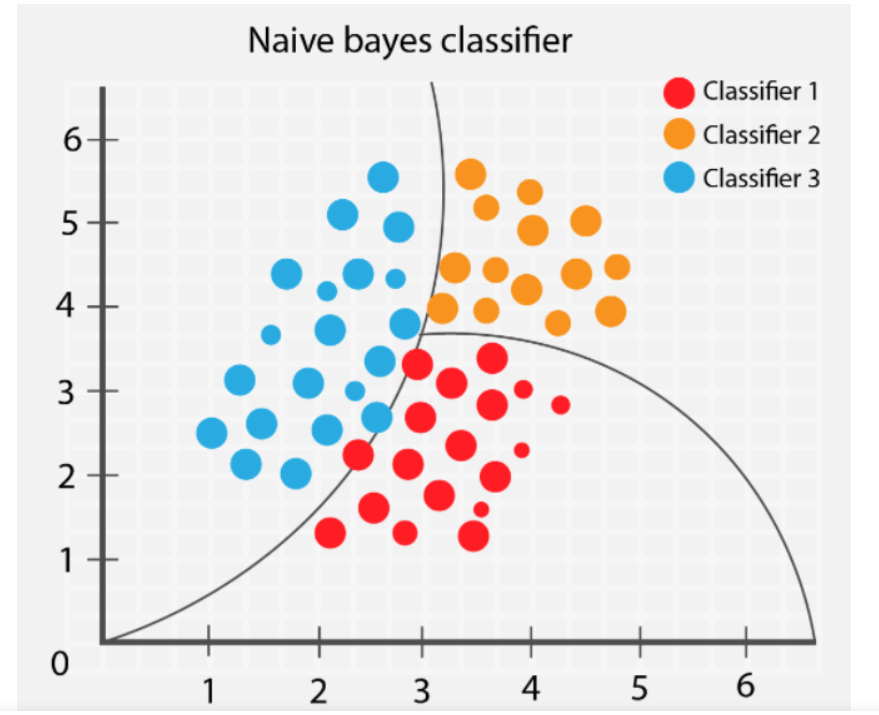

              precision    recall  f1-score   support

          -1       0.82      0.95      0.88      1707
           0       0.85      0.79      0.82      1722
           1       0.81      0.65      0.72      1724
           2       0.81      0.89      0.85      1671

    accuracy                           0.82      6824
   macro avg       0.82      0.82      0.82      6824
weighted avg       0.82      0.82      0.82      6824



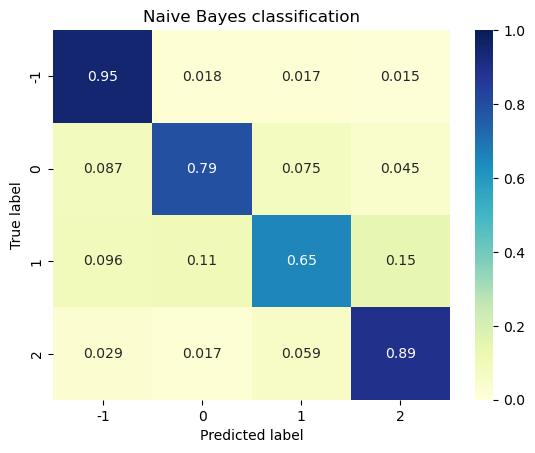

In [37]:
# Generate a classification Report for the Naive Bayes model
print(metrics.classification_report(y_test, y_pred_nb))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=nb.classes_, 
            yticklabels=nb.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Naive Bayes classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- The primary objective of model comparison and selection is definitely better performance of the machine learning software/solution. The objective is to narrow down on the best algorithms that suit both the data and the business requirements.

In [38]:
LR_score = metrics.accuracy_score(y_pred_lr, y_test)
LSVC_score = metrics.accuracy_score(y_pred_lsvc, y_test)
RF_score = metrics.accuracy_score(y_pred_rf, y_test)
KNN_score = metrics.accuracy_score(y_pred_knn, y_test)
NB_score = metrics.accuracy_score(y_pred_nb, y_test)

In [39]:
F1_scores = {
    'Models' : ['Logistic Regression', 'Linear SVc', 'KNN', 'Naive Bayes','Random Forest'],
    'F1_Score' : [LR_score,LSVC_score,KNN_score,NB_score,RF_score]
}
  
# creating a Dataframe object 
f1_df = pd.DataFrame(F1_scores)
  

In [40]:
f1_df

Models  F1_Score
0  Logistic Regression  0.858880
1           Linear SVc  0.940358
2                  KNN  0.778136
3          Naive Bayes  0.820926
4        Random Forest  0.515094

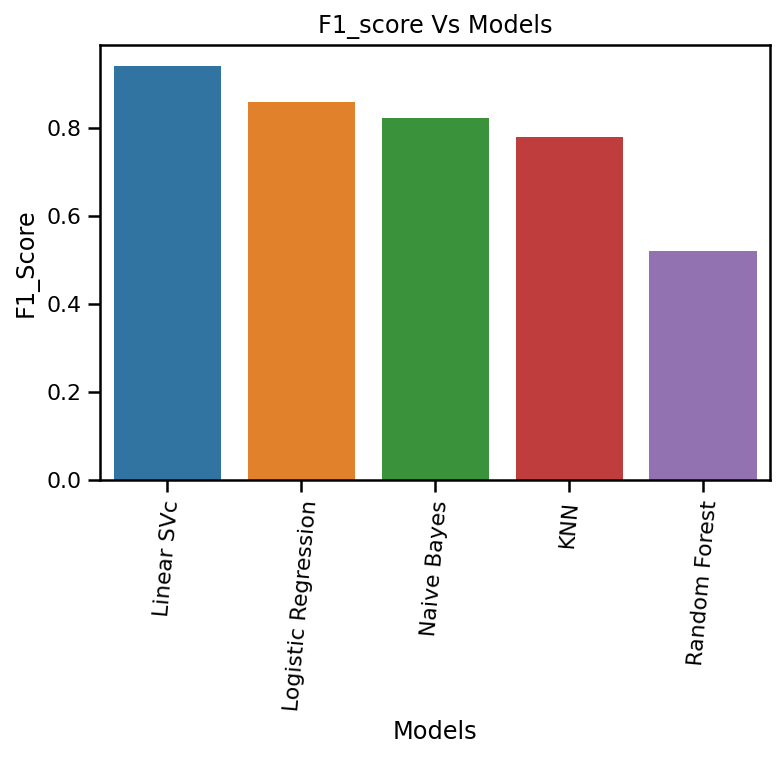

In [189]:
sns.barplot(x= f1_df['Models'], y = f1_df['F1_Score'],data=f1_df,order=f1_df.sort_values('F1_Score',ascending = False).Models) 


plt.title('F1_score Vs Models')
plt.xticks(rotation=85)
plt.show()

# Kaggle Submission

In [42]:
df_test.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

In [43]:
# applying same cleaning procedure

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+' ## Remove urls 
subs_url = r''
df_test['message_clean'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True) ## replace all urls with clean space

# Make lower case
df_test['message_clean'] = df_test['message_clean'].str.lower()

# remove twitter handles (@user)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

df_test['message_clean'] = np.vectorize(remove_pattern)(df_test['message_clean'], "@[\w]*")

# removing punctuations
import string
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])
df_test['message_clean'] = df_test['message_clean'].apply(remove_punctuation)

df_test['message_clean'] = df_test['message_clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [44]:
def decontracted(phrase):
    phrase = phrase.rstrip() #returns a copy of the string in which all characters have been stripped from the end of the string
    phrase = ' '.join(phrase.split()) #Join all items in a tuple into a string
    phrase = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', phrase) #remove special cases
    phrase = re.sub('@[\w]+','',phrase) # remove @ mentioned users
    phrase = re.sub(r'[^\x00-\x7f]',r'', phrase) #remove all non-ASCII characters
    return phrase

df_test['message_clean'] = df_test['message_clean'].apply(decontracted)

In [45]:
df_test.head()

message  tweetid  \
0  Europe will now be looking to China to make su...   169760   
1  Combine this with the polling of staffers re c...    35326   
2  The scary, unimpeachable evidence that climate...   224985   
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263   
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928   

                                       message_clean  
0  europe will looking china make sure that alone...  
1  combine this with polling staffers climate cha...  
2  scary unimpeachable evidence that climate chan...  
3  putin jill trump doesnt believe climate change...  
4  female orgasms cause global warming sarcastic ...

In [49]:
# saving as csv for Kaggle submission
y_test = lsvc.predict(df_test['message_clean'])
output = pd.DataFrame({'tweetid': df_test.tweetid,
                       'sentiment': y_test})
output.to_csv('submission_2.csv', index=False)
output

tweetid  sentiment
0       169760          1
1        35326          1
2       224985          1
3       476263          1
4       872928          0
...        ...        ...
10541   895714          1
10542   875167          1
10543    78329          2
10544   867455          0
10545   470892          1

[10546 rows x 2 columns]

In [56]:
f1 = f1_score(y_test, y_pred_lsvc,average='macro')
precision = precision_score(y_test, y_pred_lsvc,average='macro')
recall = recall_score(y_test, y_pred_lsvc,average='macro')

In [57]:
params = {"random_state": 24,
          "model_type": "SVC",
          }
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

In [58]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [59]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/nuel000/edsa-twitter-sentiment-classification/8a511d7600f540ecac8941e5862d3873
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.9399747840290383
COMET INFO:     precision : 0.9400684837334735
COMET INFO:     recall    : 0.9406261701845232
COMET INFO:   Parameters:
COMET INFO:     C                             : 1
COMET INFO:     algorithm                     : auto
COMET INFO:     alpha                         : 1.0
COMET INFO:     bootstrap                     : True
COMET INFO:     break_ties                    : False
COMET INFO:     cache_size                    : 200
COMET INFO:     ccp_alpha                     : 0.0
COMET INFO:     class_prior                   : 1
COMET INFO:     class_weight                  : 3
COMET INFO:     clf  

- Now, we have tried five models — Radom Forest, Logistic Regression, Support Vector Machine (SVM), Naive Bayes Classifier and The K-Nearest Neigbors to look for the best model that we can use for our test set.

- The weighted F1 score from SVC is 0.9400 which seem to be pretty good.

**F1 score** is the harmonic mean of precision and recall. It combines precision and recall into a single number, which also means it accounts for both FPs and FNs.

- In statistical analysis of binary classification, the F-score is a measure of a test's accuracy. 

- Weighted F1 score is the weighted average score of F1 scores for sentiment `-1`, `0`, `1` and sentiment `2` which we can see from the above classification report.

- SVC gives us a weighted F1 score of 0.94 which is was the best.

<a id="eight" id="1.1"></a>
# Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

After successfully training and evaluating our models, we decided to opt for Linear Support vector Classifying as it gave us the best accuracy being 94%. However, the model can be further improved on by carrying out other hyper parameter tunning such as:

* GridSearch CV

* SelectKBest

* Variance Threshold Method


- Whether you are launching a new feature on your platform, a site redesign, or a new marketing campaign, you may want to track customer reactions on Twitter.

- Taking action and making changes or improvements in real-time will help maintain customer loyalty, and can even help spread the word about your new feature.

- From people's reaction on Tweet, we advice the company to go ahead as people respond favourably to climate change issues.


<a id="nine" id="1.1"></a>
## Additional Thoughts
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- Experiment showed that prediction of text sentiment is a non-trivial task for machine learning. A lot of preprocessing is required just to be able to run any algorithm and see results.

**Problem** for this climate change sentiment analysis is to craft the machine representation of the text. A lot of additional features would have been created for a better prediction e.g. number of emoticons, exclamation marks etc. A slight improvement in classification accuracy for the given training dataset could be developed, but since it contained highly skewed data (small number of negative cases) though resolved with resampling, the difference will be probably in the order of a few percent.
The thing that could possibly improve classification results will be to add a lot of additional examples (increase training dataset though its high already), because these given examples obviously do not contain every combination of words usage, moreover - a lot of emotion-expressing words surely are missing.

<a id="ten" id="1.1"></a>
# References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

1. How to remove Emojis from a Dataframe: 
https://www.appsloveworld.com/pandas/100/362/how-to-remove-emojis-from-panda-dataframe-column-works-on-individual-string-but

2. Grid Search with TF-IDF Vectorizer
https://stackoverflow.com/questions/64258622/gridsearchcv-with-tfidf-and-count-vectorizer

3. Comprehensive Hands on Guide to Twitter Sentiment Analysis with dataset and code
https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/

4. How to remove special characters
https://www.javatpoint.com/how-to-remove-special-characters-from-string-in-java